In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import math

%matplotlib inline

In [2]:
df=pd.read_csv("/Users/igorvm/Downloads/train.csv")
df.fillna("", inplace=True)
print df.columns
train_df = df

Index([u'id', u'qid1', u'qid2', u'question1', u'question2', u'is_duplicate'], dtype='object')


In [31]:
def normalize_question(q):
    q = q.lower()
    q = q.replace("?","")
    q = q.replace("..."," . ")
    q = q.replace(".."," . ")
    q = q.replace("."," . ")
    q = q.replace(":"," : ")
    q = q.replace(","," , ")
    q = q.replace("/"," / ")
    q = q.replace("("," ( ")
    q = q.replace(")"," ) ")
    q = q.replace("n't", " not ")
    q = q.replace("i'm", "i am")
    q = q.replace("[math]", " [math] ")
    q = q.replace("[/math]", " [/math] ")
    q = q.replace("-"," - ")
    q = q.replace('"',' " ')
    q = q.replace("'s", " 's ")
    words = q.lower().split()
    #words = map(lambda x: x.strip(), words)
    #words = filter(lambda x: len(x) > 0, words)
    words = map(lambda w: w[:-1] + " s" if len(w)>3 and w[-1]=='s' and w != "this" else w, words)
    return " ".join(words)

def word_frequencies(questions):
    words = " ".join(questions).split(" ")
    counter = Counter(words)
    return sorted(counter.items(), key=lambda x:-x[1])

def cumulative(n):
    s = 0
    n = sorted(n)
    cx, cy = [], []
    last_n = None
    for ni in n:
        s += 1
        if ni != last_n:
            last_n = ni
            cx.append(ni)
            cy.append(s)
        else:
            cy[-1] = s
    x = np.array(cx)
    y = np.array(cy, dtype=np.float32)/s
    return x, y

def plot_cumulative(x):
    cx, cy = cumulative(x)

    ticks_major = np.arange(0.0, 1.1, 0.1)
    ticks_minor = np.arange(0.0, 1.1, 0.05)

    xticks = np.arange(0.0, 200.0, 10)

    fig = plt.figure()                                                               
    ax = fig.add_subplot(1,1,1)                                                      

    ax.plot(cx, cy)
    ax.set_xticks(xticks)                                                       
    ax.set_yticks(ticks_major)                                                       
    ax.set_yticks(ticks_minor, minor=True)                                                       
    ax.grid(True, which="both")
    plt.xscale("log")
    plt.show()

In [32]:
train_questions = df["question1"].tolist() + df["question2"].tolist()
train_questions = set(train_questions)
train_questions = map(normalize_question, train_questions)


In [20]:

train_frequencies = word_frequencies(train_questions)



In [21]:
print "number of different words in train questions:", len(train_frequencies)

number of different words in train questions: 88939


In [22]:
most_frequent_train_words=set([w for w,n in train_frequencies[:200]])

print "most frequent train words:", most_frequent_train_words



most frequent train words: set(['all', 'think', 'help', 'just', 'being', '-', 'over', 'month', 'human', 'using', 'go', 'still', 'find', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'book', 'money', 'has', 'app', 'do', 'them', 'good', 'get', 'quora', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'name', 'service', 'school', 'like', 'did', 'she', 'science', 'become', 'guy', 'where', 'mean', 'google', 'old', 'people', 'some', 'see', 'computer', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'movie', '/', 'its', '3', 'indian', 'between', 'new', 'ever', 'be', 'we', 'after', 'exam', 'state', 'learn', 'free', 'job', 'by', 'change', 'on', 'about', 'her', 'language', 'english', 'of', 'could', 'thing', 's', 'place', 'busines', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'question', 'system', 'long', '.', 'their', 'live', 'much', 'way', 'wom

In [35]:
test_df = pd.read_csv("/Users/igorvm/Downloads/test.csv")
test_df.fillna("", inplace=True)
print test_df.columns

Index([u'test_id', u'question1', u'question2'], dtype='object')


In [37]:
test_questions = map(normalize_question, set(test_df["question1"].tolist() + test_df["question2"].tolist()))
#test_frequencies = word_frequencies(test_questions)

In [38]:
all_questions = set(test_questions+train_questions)
all_frequencies = word_frequencies(all_questions)


In [10]:
NFrequentWords = 2000
most_frequent_words = [w for w, n in all_frequencies[:NFrequentWords]]
print "most frequent words:", most_frequent_words



most frequent words: ['s', 'the', 'what', 'is', 'i', 'a', 'how', 'in', 'to', 'of', 'do', 'are', 'and', 'for', 'can', ',', '.', 'why', 'you', 'it', 'my', 'best', 'on', 'doe', '"', 'or', 'which', 'if', 'get', '-', 'with', "'s", 'be', 'have', 'that', 'should', 'an', 'from', 'some', ')', '(', 'india', 'not', 'your', 'like', 'when', 'at', 'good', 'who', 'will', '/', 'people', 'there', 'way', 'as', 'am', 'would', 'one', 'make', 'between', 'where', 'about', 'me', 'time', ':', 'most', 'any', 'difference', 'we', 'by', 'was', 'after', 'did', 'so', 'year', 'life', 'use', 'quora', 'this', 'they', 'much', 'has', 'know', 'learn', 'other', 'their', 'work', 'someone', 'money', 'indian', 'many', 'day', 'better', 'book', 'want', 'thing', 'than', 'job', 'more', 'all', 'find', 'but', 'mean', 'new', 'girl', 'english', 'without', 'movie', 'think', 'question', 'start', 'become', 'online', 'out', 'first', 'engineering', 'world', 'take', 'possible', 'ever', 'into', 'up', 'college', 'he', 'love', '2016', 'feel'

In [126]:
print "all words in train and test questions:", len(all_frequencies)

all words in train and test questions: 129835


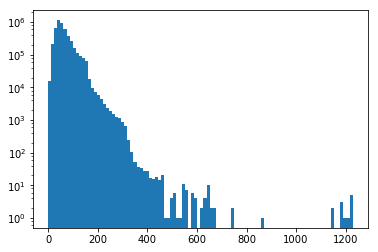

In [85]:
qlengths = map(len, all_questions)

plt.hist(qlengths, bins=100)
plt.yscale('log')
plt.show()



0.0 2.08974318519e-07
1.0 2.29871750371e-06
2.0 6.89615251113e-06
3.0 1.58820482074e-05
4.0 2.65397384519e-05
5.0 5.62140916816e-05
6.0 0.000118697412919
7.0 0.000265397384519
8.0 0.000514703746512
9.0 0.000870795985269
10.0 0.00140430742045
11.0 0.00217709445033
12.0 0.00318706733173
13.0 0.00447100554472
14.0 0.00602765524336
15.0 0.00799138691449
16.0 0.010354259534
17.0 0.0131722782192
18.0 0.0164291429733
19.0 0.0202458499268
20.0 0.0245651401162
21.0 0.0294963071103
22.0 0.0350199162974
23.0 0.0411925997178
24.0 0.0480492560828
25.0 0.0556935366542
26.0 0.0640727799039
27.0 0.0731669242972
28.0 0.083100518528
29.0 0.093763851079
30.0 0.105330579609
31.0 0.117764133612
32.0 0.130905065684
33.0 0.144833830936
34.0 0.159335394795
35.0 0.17461873158
36.0 0.190427638776
37.0 0.206921981737
38.0 0.224023604067
39.0 0.241597090409
40.0 0.259608168973
41.0 0.278073557706
42.0 0.296734546401
43.0 0.315677441452
44.0 0.334742168531
45.0 0.353842839192
46.0 0.372915925243
47.0 0.39189079336

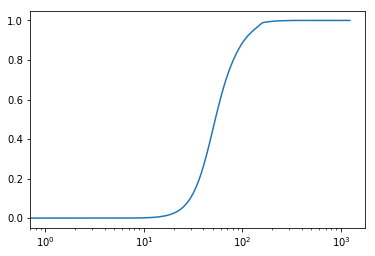

In [83]:
from collections import Counter

counter = Counter(qlengths)
x = []
y = []
cumulative = 0
for (l, n) in sorted(counter.items(), key=lambda x:x[0]):
    cumulative += n
    x.append(l)
    y.append(cumulative)

x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)/cumulative

for i in range(len(x)):
    print x[i], y[i]

plt.plot(x, y)

plt.xscale('log')
plt.show()



In [34]:
normalized_train_pairs = [(normalize_question(q1).split(), normalize_question(q2).split()) 
                    for i, q1, q2 in df[["question1", "question2"]].itertuples()]


In [35]:
normalized_test_pairs = [(normalize_question(q1).split(), normalize_question(q2).split()) 
                    for i, q1, q2 in test_df[["question1", "question2"]].itertuples()]


In [38]:
normalized_pairs = normalized_train_pairs + normalized_test_pairs
intersections = [set(q1).intersection(set(q2)) for q1, q2 in normalized_pairs]
repeating_words = set()
for x in intersections:
    repeating_words |= x

In [39]:
len(repeating_words)

35988

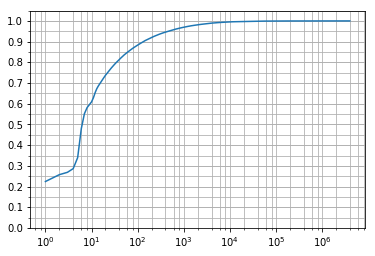

In [111]:
plot_cumulative([n for w, n in all_frequencies])

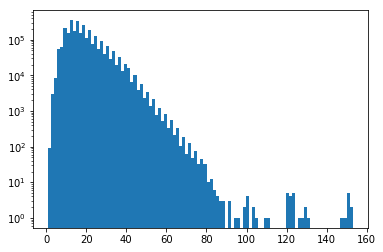

In [88]:
unions = [set(q1) | set(q2) for q1, q2 in normalized_pairs]
plt.hist(map(len, unions), bins=100)
plt.yscale("log")
plt.show()

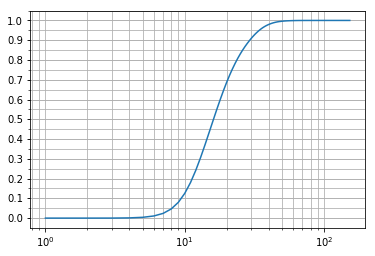

In [112]:
plot_cumulative(map(len, unions))

In [114]:
unions_infrequent = [u - most_frequent_words for u in unions]


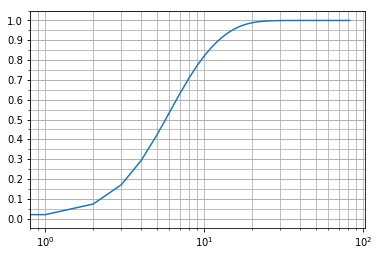

In [115]:
plot_cumulative(map(len, unions_infrequent))

In [112]:
print "number of different test questions:", len(test_questions)
print "number of different words in test questions:", len(test_frequencies)

number of different test questions: 4363832
number of different words in test questions: 103870


In [116]:
train_words = set([w for w, n in train_frequencies])
test_words = set([w for w, n in test_frequencies])

print "test:           ", len(test_words)
print "train:          ", len(train_words)
print "intersect:      ", len(test_words.intersection(train_words))
print "union:          ", len(test_words.union(train_words))
print "test-train:     ", len(test_words-train_words)
print "train-test:     ", len(train_words-test_words)


test:            103870
train:           97605
intersect:       60158
union:           141317
test-train:      43712
train-test:      37447


In [114]:
most_frequent_test_words = set([w for w, n in test_frequencies[:200]])
print "most frequent test words:", most_frequent_test_words

most frequent test words: set(['all', 'just', 'being', 'money', 'over', 'years', 'questions', 'using', 'go', 'still', 'find', 'before', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'indian', 'has', 'app', 'do', 'them', 'someone', 'get', 'quora', 'stop', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'going', 'like', 'did', 'university', 'book', 'she', 'become', 'where', 'mean', 'google', 'old', 'instagram', 'weight', 'people', 'some', 'back', 'up', 'see', 'books', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'ways', 'movie', '/', 'its', '3', 'does', 'between', 'new', 'ever', 'android', 'be', 'we', 'after', 'exam', 'business', 'of', 'free', 'job', 'by', 'change', 'improve', 'on', 'about', 'her', 'language', 'english', 'many', 'could', 'programming', 'thing', 'women', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'learning', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'long', 

In [115]:
print "most frequent train words:", most_frequent_train_words

most frequent train words: set(['all', 'help', 'just', 'being', '-', 'over', 'years', 'using', 'go', 'still', 'find', 'before', 'now', '(', 'had', ',', 'should', 'better', 'to', 'only', 'indian', 'money', 'has', 'app', 'real', 'do', 'them', 'good', 'get', 'quora', 'stop', 'possible', '2', 'were', 'facebook', 'know', 'they', 'not', 'world', 'difference', 'day', 'going', 'school', 'like', 'did', 'university', 'book', 'bad', 'she', 'become', 'where', 'mean', 'google', 'old', 'people', 'some', 'back', 'sex', 'see', 'books', 'college', 'are', 'year', 'girl', 'best', 'out', 'what', 'for', 'ways', 'movie', '/', 'its', '3', 'does', 'between', 'new', 'ever', 'android', 'be', 'we', 'after', 'business', 'learn', 'free', 'job', 'by', 'change', 'on', 'about', 'her', 'language', 'english', 'many', 'could', 'thing', 'women', 'or', 'first', 'love', 'feel', 'into', 'number', 'one', 'been', 'your', 'trump', 'use', '"', 'from', 'would', 'start', 'there', 'two', 'long', '.', 'their', 'live', 'much', 'way'

In [123]:
print "intersect:      ", len(most_frequent_test_words.intersection(most_frequent_train_words))
print "union:          ", len(most_frequent_test_words.union(most_frequent_train_words))
print "most frequent test words, not in most frequent train words:\n", most_frequent_test_words - most_frequent_train_words
print "most frequent train words, not in most frequent test words:\n", most_frequent_train_words - most_frequent_test_words

diff = most_frequent_test_words - most_frequent_train_words
for w in diff:
    n = 0
    for q in test_questions:
        if w in q:  n += 1
    print w, n

intersect:       191
union:           209
most frequent test words, not in most frequent train words:
set(['exam', 'word', 'instagram', 'weight', 'programming', 'learning', 'prepare', 'questions', 'improve'])
most frequent train words, not in most frequent test words:
set(['real', 'school', 'made', 'help', 'two', 'bad', 'examples', 'student', 'happen'])
exam 65593
word 51866
instagram 25242
weight 32315
programming 25407
learning 25397
prepare 27258
questions 30975
improve 40187


In [149]:
nwords = len(most_frequent_words)
print most_frequent_words[:10]
frequent_encoding = {}
for i, w in enumerate(most_frequent_words):
    frequent_encoding[w] = i
print frequent_encoding


['s', 'the', 'what', 'is', 'i', 'a', 'how', 'in', 'to', 'of']
{'magnetic': 1724, 'four': 1375, 'sleep': 617, 'asian': 1179, 'hate': 540, 'forget': 1524, 'increase': 338, 'calculate': 836, 'eligible': 1894, 'electricity': 1722, 'bike': 889, 'under': 234, 'lord': 1226, 'worth': 397, 'digit': 1811, 'chennai': 959, 'risk': 1529, 'every': 366, 'affect': 399, 'school': 195, 'solution': 643, 'hr': 1907, 'math': 536, 'reliable': 1674, 'enjoy': 1160, 'force': 508, 'japanese': 570, 'second': 648, 'street': 1470, 'air': 434, 'even': 285, 'brexit': 967, 'hide': 1578, '+': 1044, 'selected': 1563, 'hp': 1583, 'weren': 1826, 'above': 945, 'designing': 1960, 'new': 103, 'net': 798, 'ever': 119, 'told': 1250, 'men': 253, 'here': 856, 'met': 1492, 'protection': 1984, 'china': 273, 'active': 1348, 'path': 1755, '100': 877, "aren't": 1352, 'studie': 458, 'dry': 1795, 'property': 1325, 'daughter': 1458, 'study': 207, 'changed': 733, 'credit': 553, 'smoke': 1645, 'military': 951, 'suitable': 1315, 'campaign

In [13]:
bits2 = [
    (-1,-1),
    (-1,1),
    (1,-1),
    (1,1)
]

def make_encoding2(N):
    rows = (N-1)*N*2
    encoding_bits = []
    encoding_index = []
    k = 0
    for i in xrange(N-1):
        for j in xrange(i+1, N):
            for dx in xrange(4):
                encoding_index.append((i,j))
                encoding_bits.append(bits2[dx])
            k += 4
    return np.array(encoding_index), np.array(encoding_bits) 
NBitsFrequent = int(math.ceil(math.sqrt(float(len(most_frequent_words))/2.0)))+1
print NBitsFrequent, "bits need to be allocated for",len(most_frequent_words),"words"

frequent_encoding_index, frequent_encoding_bits = make_encoding2(NBitsFrequent)

print "encoding table of size",len(frequent_encoding_index),"is generated"

frequent_encoding = {w: (frequent_encoding_index[i], frequent_encoding_bits[i]) for i, w in enumerate(most_frequent_words)}
print frequent_encoding

33 bits need to be allocated for 2000 words
encoding table of size 2112 is generated
{'magnetic': (array([18, 27]), array([-1, -1])), 'four': (array([13, 19]), array([1, 1])), 'sleep': (array([ 5, 10]), array([-1,  1])), 'asian': (array([10, 30]), array([1, 1])), 'hate': (array([ 4, 18]), array([-1, -1])), 'forget': (array([15, 22]), array([-1, -1])), 'increase': (array([ 2, 24]), array([ 1, -1])), 'calculate': (array([ 7, 14]), array([-1, -1])), 'eligible': (array([22, 23]), array([ 1, -1])), 'electricity': (array([18, 26]), array([ 1, -1])), 'bike': (array([ 7, 27]), array([-1,  1])), 'under': (array([ 1, 28]), array([ 1, -1])), 'lord': (array([11, 21]), array([ 1, -1])), 'worth': (array([ 3, 10]), array([-1,  1])), 'digit': (array([20, 23]), array([1, 1])), 'chennai': (array([ 8, 20]), array([1, 1])), 'risk': (array([15, 23]), array([-1,  1])), 'every': (array([ 2, 31]), array([ 1, -1])), 'affect': (array([ 3, 10]), array([1, 1])), 'school': (array([ 1, 18]), array([1, 1])), 'soluti

In [14]:
max_infrequent_words = 25
NBitsInfrequent = int(math.ceil(math.sqrt(float(max_infrequent_words)/2.0)))+1
print NBitsInfrequent,"bits needed to encode",max_infrequent_words,"infrequent words"
infrequent_encoding_index, infrequent_encoding_bits = make_encoding2(NBitsInfrequent)



5 bits needed to encode 25 infrequent words


In [24]:
def encode_question(words, nf_bits, frequent_encoding, nextra_bits, infrequent_encoding, match_set):
    nbits = nf_bits + nextra_bits + 1
    encoded = np.zeros((len(words)+1, nbits), dtype=np.int8)
    for i, w in enumerate(words):
        if w in frequent_encoding:
            inx, bits = frequent_encoding[w]
            encoded[i,inx] = bits
        else:
            inx, bits = infrequent_encoding[w]
            encoded[i,nf_bits:][inx] = bits
        if w in match_set:   encoded[i,-1] = 1
        #print "%s -> %s" % (w, encoded[i])
    encoded[-1] = -np.ones((nbits,), dtype=np.int8)
    return encoded

def encode_pair(q1, q2, frequent_set, frequent_encoding, nf_bits, infrequent_encoding_index, infrequent_encoding_bits, nextra_bits):
    # q1 and q2 are unnormalized questions
    
    q1 = normalize_question(q1)
    q2 = normalize_question(q2)
    q1_words = q1.split()
    q2_words = q2.split()
    q1_words_set = set(q1_words)
    q2_words_set = set(q2_words)
    match = q1_words_set & q2_words_set
    union = q1_words_set | q2_words_set
    infrequent = union - frequent_set
    infrequent_table_max = len(infrequent_encoding_index)-1
    infrequent_encoding = {w: 
            (  infrequent_encoding_index[min(i, infrequent_table_max)], 
               infrequent_encoding_bits[min(i, infrequent_table_max)]) 
        for i, w in enumerate(infrequent)}
    q1_encoded = encode_question(q1_words, nf_bits, frequent_encoding, nextra_bits, infrequent_encoding, match)
    q2_encoded = encode_question(q2_words, nf_bits, frequent_encoding, nextra_bits, infrequent_encoding, match)
    return q1_encoded, q2_encoded
    
def encode_question_text(words, frequent_set, common_set, encoding):
    encoded = (
            (w if w in frequent_set else encoding[w], w in common_set) for w in words
        )
    return [w.upper() if c else w for w, c in encoded]

def encode_pair_text(q1, q2, frequent_set):
    import string
    # q1 and q2 are unnormalized questions
    q1 = normalize_question(q1)
    q2 = normalize_question(q2)
    q1_words = q1.split()
    q2_words = q2.split()
    q1_words_set = set(q1_words)
    q2_words_set = set(q2_words)
    common_words = q1_words_set & q2_words_set
    other_words = q1_words_set ^ q2_words_set
    infrequent_words = (q1_words_set | q2_words_set) - frequent_set
    
    words = ["[%s]" % (w,) for w in string.lowercase] + \
        ["[%s%s]" % (u,v) for u in string.lowercase for v in string.lowercase]
    encoding = dict((w, words[i]) for i, w in enumerate(infrequent_words))
    
    q1_encoded = encode_question_text(q1_words, frequent_set, common_words, encoding)
    q2_encoded = encode_question_text(q2_words, frequent_set, common_words, encoding)
    
    return q1_encoded, q2_encoded
    

    
    

In [135]:
df100 = df[:100]
for i, ii, qid1, qid2, q1, q2, dup in df100.itertuples():
    print q1
    print q2
    q1_encoded, q2_encoded = encode_pair_text(q1, q2, most_frequent_words)
    print q1_encoded
    print q2_encoded
    print dup
    print

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
['WHAT', 'IS', 'THE', '[B]', 'BY', '[B]', '[D]', 'TO', '[A]', 'IN', '[C]', 'MARKET', 'IN', 'india']
['WHAT', 'IS', 'THE', '[B]', 'BY', '[B]', '[D]', 'TO', '[A]', 'IN', '[C]', 'MARKET']
0

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
['WHAT', 'is', 'THE', '[b]', 'of', '[D]', '(', '[A]', '-', 'I', '-', '[E]', ')', '[C]']
['WHAT', 'would', 'happen', 'if', 'THE', 'indian', 'government', '[f]', 'THE', '[D]', '(', '[A]', '-', 'I', '-', '[E]', ')', '[C]', 'back']
0

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?
['HOW', 'CAN', 'i', 'increase', 'the', '[F]', 'of', 'my', 'INTERNET', '[b]', 'while', 'using', 'a', '[e]']
['HOW', 'CAN', 'INTERNET', '[F]', 'be', '[a]', 'by', '[d]', 'through', '[c

In [25]:
frequent_set = set(frequent_encoding.keys())
for i, pid, qid1, qid2, q1, q2, dup in df.itertuples():
    q1_encoded, q2_encoded = encode_pair(q1, q2, frequent_set, frequent_encoding, NBitsFrequent, infrequent_encoding_index, infrequent_encoding_bits, NBitsInfrequent)
    print q1
    print q2
    print q1_encoded
    print q2_encoded
    if i > 2: break


What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
[[ 1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [-1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  1]
 [-1  0  0 -1  0  0  

In [27]:
train_data = [
    encode_pair(q1, q2, frequent_set, frequent_encoding, NBitsFrequent, infrequent_encoding_index, infrequent_encoding_bits, NBitsInfrequent)+
    (is_dup,)
    for i, id, qid1, qid2, q1, q2, is_dup in train_df.itertuples()
]

In [28]:
train_encoded = pd.DataFrame(train_data, columns=["q1","q2","dup"])

In [30]:
train_encoded.head(10)

,q1,q2,dup
0,"[[1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
1,"[[1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
2,"[[1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
3,"[[-1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
4,"[[1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...","[[1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...",0
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[-1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
6,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
7,"[[1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
8,"[[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0...","[[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0...",0
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0
